In [1]:
using NCDatasets
using Statistics
using Dates
using PyPlot
push!(LOAD_PATH, "../julia/")
using SST
using DINEOFtools

┌ Info: Precompiling SST [top-level]
└ @ Base loading.jl:1260


## Files and directories

In [2]:
datamonthdir = "/data/SST/Global/monthly/"
dataclimdir = "/data/SST/Global/monthly_clim/"
outputdir = "/data/SST/Global/DINEOF/"

"/data/SST/Global/DINEOF/"

Create lists of files

In [3]:
sst_month_list = SST.get_sst_file_list(datamonthdir);
sst_clim_list = SST.get_sst_file_list(dataclimdir);

┌ Info: Found 245 files
└ @ SST /home/ctroupin/Projects/FNRS-UpwellingFilaments/Filament-Submesoscale/julia/SST.jl:26
┌ Info: Found 12 files
└ @ SST /home/ctroupin/Projects/FNRS-UpwellingFilaments/Filament-Submesoscale/julia/SST.jl:26


## Main loop 

In [4]:
sat = "TERRA"
sensor = "MODIS"
domain = [-20, -8., 25., 33.]
valex = -999.

# Allocation
ntimes = length(sst_month_list)
sstanom = Array{Float64, 3}(undef, 144, 96, ntimes);
times = Vector{Float32}(undef, ntimes);

In [10]:
for (ii, datafiles) in enumerate(sst_month_list)
    @info("Working on file $(basename(datafiles))")
    
    year, month = SST.get_year_month_file(datafiles)

    # According to the month, the monthly climatology covers a different period
    month == 1 ? yearstart = 2001 : yearstart = 2000
    month <= 5 ? yearend = 2020 : yearend = 2019
    sstclimfile = SST.get_monthly_clim_filename(sat, sensor, yearstart, yearend, month; res="9km")
    
    if (isfile(joinpath(dataclimdir, sstclimfile)))
        
        # Read climatological field
        lon, lat, sstclim = SST.read_sst_oceancolor_L3(joinpath(dataclimdir, sstclimfile), domain);
        # Read SST
        _, _, sst = SST.read_sst_oceancolor_L3(datafiles, domain)
        
        # Compute anomalies
        sst_anom = sst .- sstclim;
        sst_anom[isnan.(sst_anom)] .= valex;
        sstanom[:,:,ii] = sst_anom;

        # Extract date
        times[ii] = (Dates.Date(year, month) - Dates.Date(1981, 1, 1)).value
        
    else
        @error("File does not exist")
    end
end

┌ Info: Working on file TERRA_MODIS.20000201_20000229.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000301_20000331.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000401_20000430.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000501_20000531.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000601_20000630.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000701_20000731.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000801_20000831.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20000901_20000930.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20001001_20001031.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20001101_20001130.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.2000

┌ Info: Working on file TERRA_MODIS.20070401_20070430.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20070501_20070531.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20070601_20070630.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20070701_20070731.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20070801_20070831.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20070901_20070930.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20071001_20071031.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20071101_20071130.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20071201_20071231.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20080101_20080131.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.2008

┌ Info: Working on file TERRA_MODIS.20140601_20140630.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20140701_20140731.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20140801_20140831.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20140901_20140930.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20141001_20141031.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20141101_20141130.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20141201_20141231.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20150101_20150131.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20150201_20150228.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.20150301_20150331.L3m.MO.SST4.sst4.9km.nc
└ @ Main In[10]:2
┌ Info: Working on file TERRA_MODIS.2015

### Create land-sea mask

In [19]:
mask, ngood = DINEOFtools.compute_mask(sstanom; threshold=0.03, valex=valex)

([1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

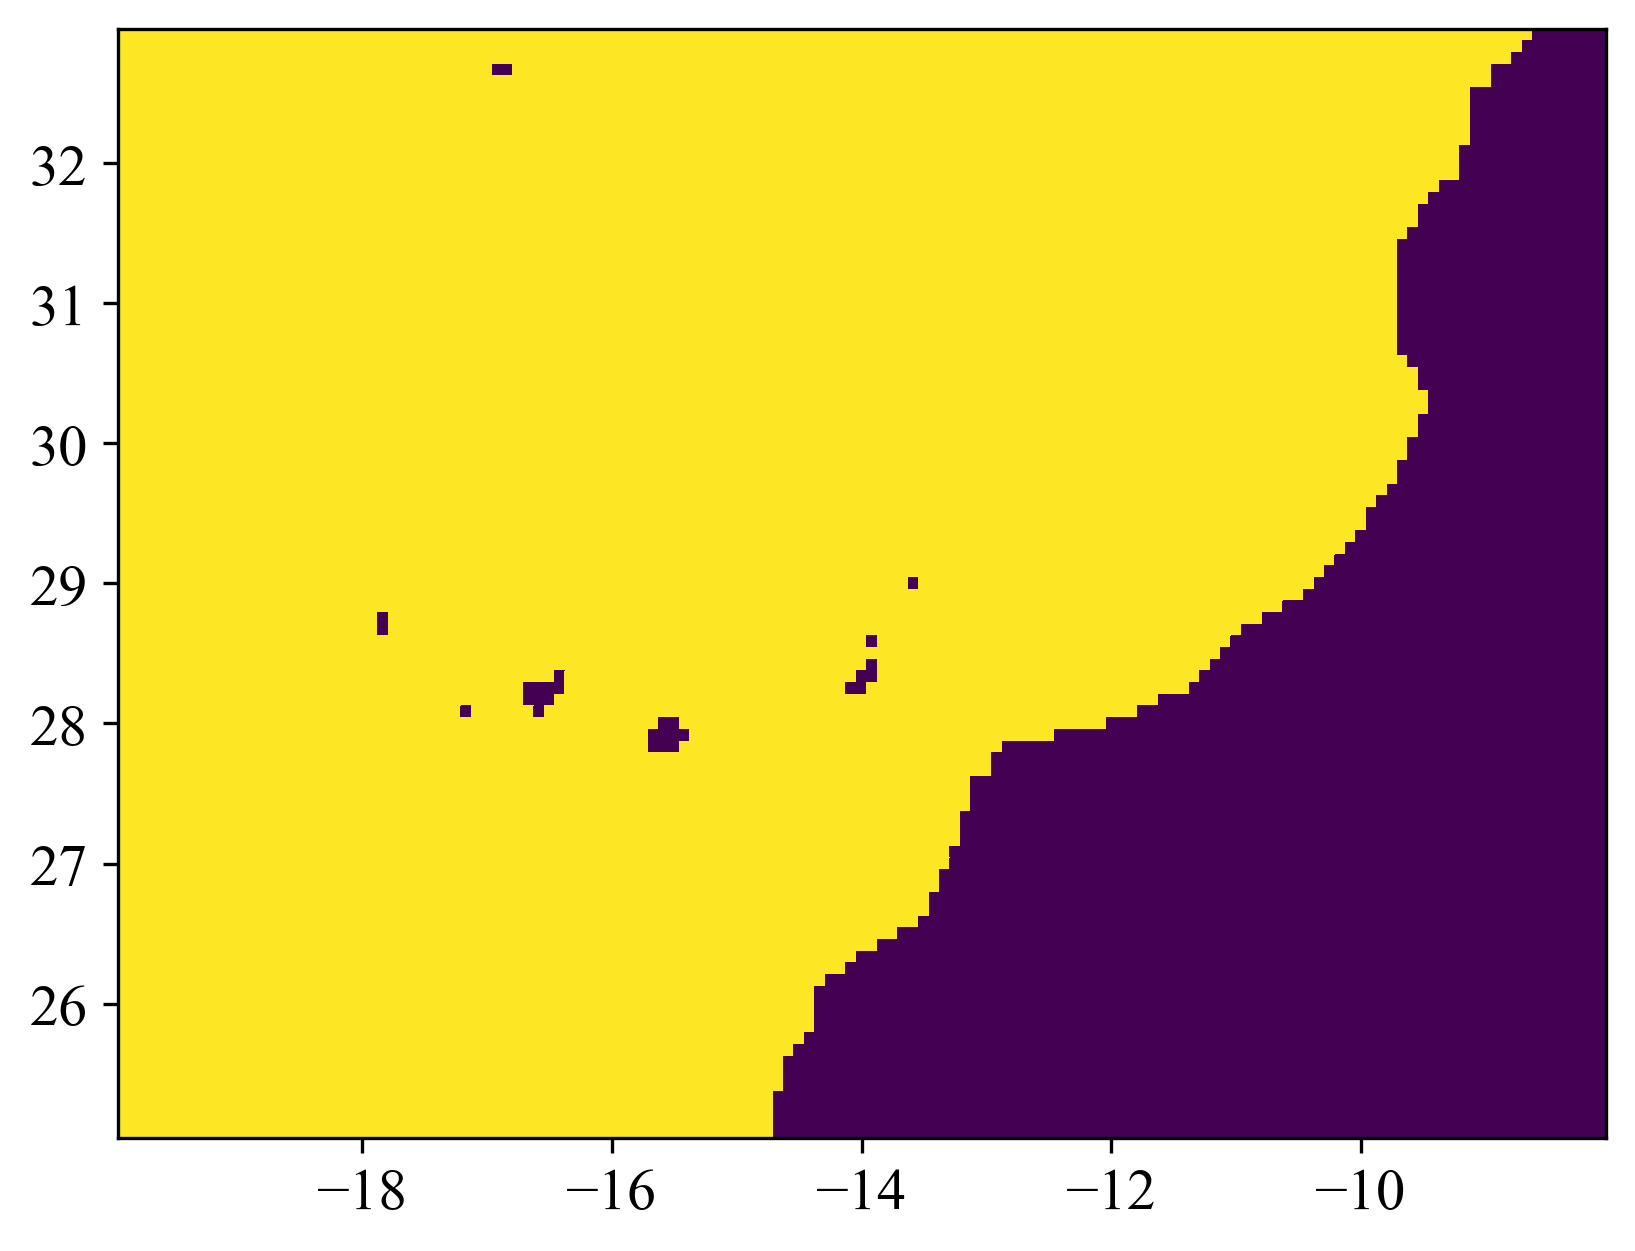

In [21]:
pcolor(lon, lat, mask')
show()

In [23]:

function create_sst_file(filename::String, lons, lats, times, sstanom, mask; valex=-999.9)
    Dataset(filename, "c") do ds

        # Dimensions
        ds.dim["lon"] = length(lons)
        ds.dim["lat"] = length(lats)
        ds.dim["time"] = Inf # unlimited dimension

        # Declare variables
        ncsst = defVar(ds,"sstanom", Float64, ("lon", "lat", "time"))
        ncsst.attrib["missing_value"] = Float64(valex)
        ncsst.attrib["standard_name"] = "sea_water_temperature_anomaly"
        ncsst.attrib["_FillValue"] = Float64(valex)
        ncsst.attrib["units"] = "degree_C"

        ncmask = defVar(ds,"mask", Int64, ("lon", "lat"))
        ncmask.attrib["long_name"] = "land sea mask"

        nctime = defVar(ds,"time", Float32, ("time",))
        nctime.attrib["missing_value"] = Float32(valex)
        nctime.attrib["units"] = "days since 1981-01-01 00:00:00"
        nctime.attrib["time"] = "time"

        nclon = defVar(ds,"lon", Float32, ("lon",))
        nclon.attrib["missing_value"] = Float32(valex)
        nclon.attrib["_FillValue"] = Float32(valex)
        nclon.attrib["units"] = "degrees East"
        nclon.attrib["lon"] = "longitude"

        nclat = defVar(ds,"lat", Float32, ("lat",))
        nclat.attrib["missing_value"] = Float32(valex)
        nclat.attrib["_FillValue"] = Float32(valex)
        nclat.attrib["units"] = "degrees North"
        nclat.attrib["lat"] = "latitude"

        # Global attributes
        ds.attrib["institution"] = "GHER - University of Liège"
        ds.attrib["title"] = "SST anomalies from MODIS TERRA 4µm"
        ds.attrib["comment"] = "Original data by Ocean Color"
        ds.attrib["data URL"] = "https://oceandata.sci.gsfc.nasa.gov/MODIS-Terra/Mapped/Monthly/9km/"
        ds.attrib["author"] = "C. Troupin, ctroupin@uliege"
        ds.attrib["tool"] = "create_nc_tile"
        ds.attrib["institution_url"] = "http://modb.oce.ulg.ac.be/"

        # Define variables
        ncmask[:] = mask
        ncsst[:] = sstanom
        nctime[:] = times
        nclon[:] = lons
        nclat[:] = lats;

    end
end

create_sst_file (generic function with 1 method)

In [26]:
create_sst_file(joinpath(outputdir, "canary_sst.nc"), lon, lat, times, sstanom, mask; valex=valex);